<a href="https://colab.research.google.com/github/jofella/Google-Colab/blob/main/RiskParity_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is a gerneric introduction to Risk Parity Strategies**
*   [Code](https://pyquantnews.com/build-your-own-risk-parity-portfolio/)
*   [What is risk parity?](https://pyquantnews.com/build-your-own-risk-parity-portfolio/)

# **1. Introduction**

**Risk parity** is a **portfolio allocation strategy** that uses **risk** to
 **determine allocations** across various components of an investment portfolio. Expention to modern portfolio theory by investing thur leverage.

Risk parity is a strategy that uses risk to find the allocations of an investment portfolio. It allocates money to stocks based on a target risk level – usually volatility.

In other words, **instead of equal dollar weights**, risk parity portfolios have **equal risk weights**.

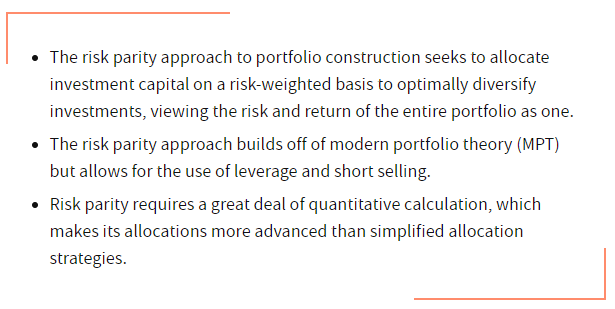

Used package is the [Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/) to create risk parity portfolios.

# **2. Get stock price data**

In [ ]:
#Install packages
!pip install yfinance
!pip install riskfolio-lib

In [8]:
#Import packages
import yfinance as yf
import riskfolio as rp
import warnings
warnings.filterwarnings("ignore") #Riskfolio-Lib prints out some warnings that are safe to ignore. So ignore them.

In [11]:
#Create a list of tickers/portfolio components

assets = ["JCI", "TGT", "CMCSA", "CPB", "MO", "APA", "MMC", "JPM",
          "ZION", "PSA", "BAX", "BMY", "LUV", "PCAR", "TXT", "TMO",
          "DE", "MSFT", "HPQ", "SEE", "VZ", "CNP", "NI", "T", "BA"]

#sort tickers
assets.sort()

In [ ]:
#Download the data
start = "2016-01-01"
end = "2019-12-30"

data = yf.download(assets, start=start, end=end)

#compute non-compounding, daily returns
returns = data['Adj Close'].pct_change().dropna()

# **3. Create a portfolio with equal risk weights**

In [21]:
#Set up a porfolio with equal risk weights --> Riskfolio-lib will find optimal weight for each stock

port = rp.Portfolio(returns=returns)
port.assets_stats(method_mu='hist', method_cov='hist', d=0.94)

#Weight optimization
w_rp = port.rp_optimization(
    model="Classic", #use historical data
    rm="MV", #uses mean-variance optimization
    hist=True, #use historical scenarios
    rf=0, #set risk free rate to 0 --> RFR rates or Swap rates
    b=None #don't use constraints
)

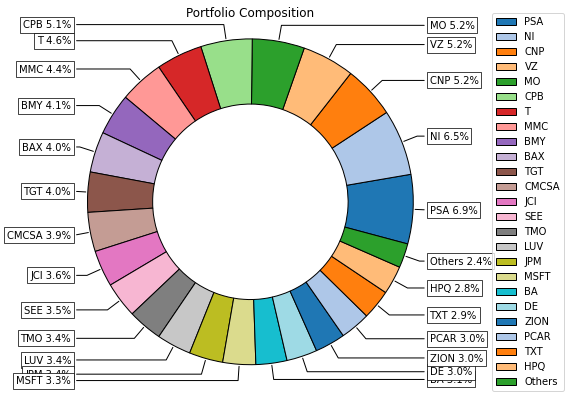

In [22]:
#Portfolio visualization
ax = rp.plot_pie(w=w_rp)

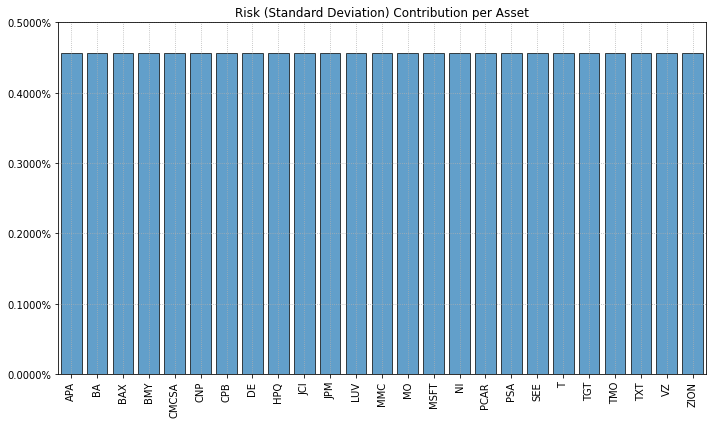

In [23]:
# show the risk contribution for each asset is equal
ax = rp.plot_risk_con(
    w_rp,
    cov=port.cov,
    returns=port.returns,
    rm="MV",
    rf=0,
)

# **4. Create a portfolio with a minimum return constraint**

A **criticism** of risk parity is that** without leverage, returns lag**. So  add a constraint Text fett markieren to weight the stocks in a way to reach a minimum portfolio return. This adds weight to higher-risk stocks to push the portfolio returns higher.

In [25]:
#Adding lower return boundary to portfolio
port.lowerret = 0.0008

#Estimate optimal portfolio with risk parity with constraint
w_rp_c = port.rp_optimization(
    model="Classic", #use historical data
    rm="MV", #uses mean-variance optimization
    hist=True, #use historical scenarios
    rf=0, #set risk free rate to 0 --> RFR rates or Swap rates
    b=None #don't use constraints
)

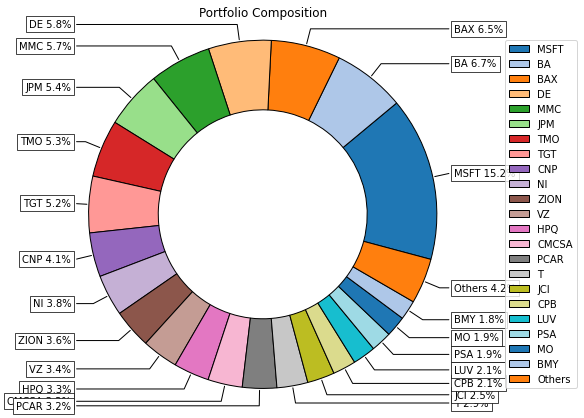

In [26]:
#Portfolio visualization
ax = rp.plot_pie(w=w_rp_c)

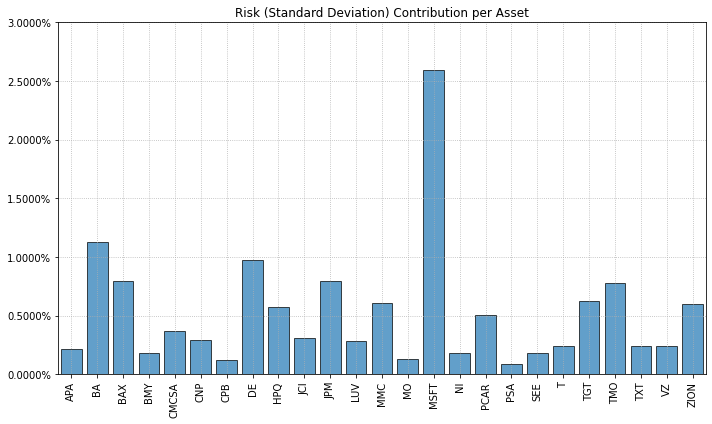

In [27]:
#Showing the risk contribution for each asset is NOT equal anymore
ax = rp.plot_risk_con(
    w_rp_c,
    cov=port.cov,
    returns=port.returns,
    rm="MV",
    rf=0,
)

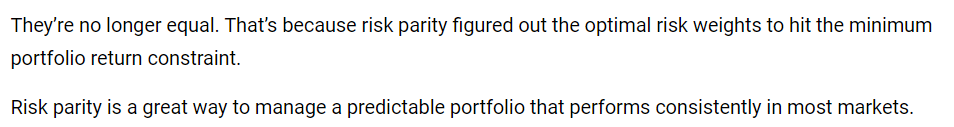